<a href="https://colab.research.google.com/github/NataKiseleva/KL/blob/main/1DZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from sklearn.metrics import classification_report

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import accuracy_score

import time

In [2]:
pip list --format=freeze > requirements.txt

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [4]:
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [5]:
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]

test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()

In [6]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

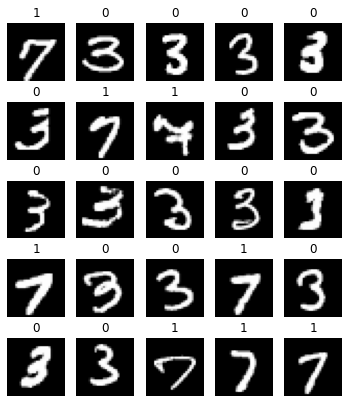

In [7]:
X, y = next(iter(train_loader))
X = X.numpy()
y = y.numpy()

plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

In [8]:
for x, y in train_loader:
    break

In [9]:
x.shape

torch.Size([128, 1, 28, 28])

In [10]:
x

tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.424

In [11]:
x.view(x.shape[0], -1).numpy().shape

(128, 784)

In [12]:
for x, y in train_loader:
    x = x.view(x.shape[0], -1).numpy()
    y = y.numpy()
    break

In [13]:
x.shape

(128, 784)

In [14]:
epochs = 3

for n_epoch in range(epochs):
    
    dataset_passed_samples = 0
    
    for x, y in train_loader:
        
        # вот здесь мы могли бы как-то манипулировать с данными
        # например, учить, но пока этого делать не будет
        # только демонстрация
        
        time.sleep(0.01)
        
        dataset_passed_samples += x.shape[0]
        
        dataset_passed_percent = dataset_passed_samples * 100 / train_loader.dataset.data.shape[0]
        
        print(f'Эпоха - {n_epoch + 1}, прошли - {dataset_passed_percent:.2f} % датасета', end='\r')
        
    print('\r')

Эпоха - 1, прошли - 100.00 % датасета
Эпоха - 2, прошли - 100.00 % датасета
Эпоха - 3, прошли - 100.00 % датасета


In [15]:
x = np.random.rand(64, 512)
x

array([[0.58443834, 0.47181284, 0.59655753, ..., 0.23830166, 0.82814771,
        0.43615729],
       [0.73784591, 0.32946238, 0.16248185, ..., 0.19338921, 0.88432703,
        0.58410133],
       [0.61995412, 0.09324849, 0.70115766, ..., 0.29125757, 0.19405436,
        0.94634586],
       ...,
       [0.06887798, 0.57591109, 0.64135992, ..., 0.23522156, 0.08137345,
        0.80435583],
       [0.14684931, 0.40683981, 0.20310031, ..., 0.41657523, 0.69383735,
        0.1658588 ],
       [0.54548837, 0.9721305 , 0.04510532, ..., 0.77256084, 0.46271148,
        0.3968916 ]])

In [16]:
x ** 2 + np.log(x)

array([[-0.19553581, -0.52856554, -0.1606987 , ..., -1.37743023,
         0.49726488, -0.63951915],
       [ 0.2403963 , -1.00174764, -1.79078863, ..., -1.60565113,
         0.65910594, -0.19650645],
       [-0.09376668, -2.36379212,  0.13659954, ..., -1.14871629,
        -1.60195988,  0.84042332],
       ...,
       [-2.6706746 , -0.22012841, -0.03282194, ..., -1.39189824,
        -2.50208464,  0.42927477],
       [-1.89678362, -0.73381714, -1.55280555, ..., -0.70215329,
         0.11589254, -1.76910932],
       [-0.30851624,  0.91677249, -3.09672062, ...,  0.33880574,
        -0.55654965, -0.76656913]])

In [17]:
y = np.random.rand(512, 1024)
# скалярное произведение
res = np.dot(x, y)

In [18]:
res.shape == (x.shape[0], y.shape[1])

True

In [25]:
learning_rate = 0.01
epochs = 30

test1 = np.random.rand(784, 256) * 0.01
bt1 = np.zeros((1, 256))


test2 = np.random.rand(256, 1) * 0.01
bt2 = np.zeros((1, 1))

losses = []

def sigmoid(z):
  return 1/(1 + np.exp(-z))

def relu(z):
  return np.maximum(z,0)


def cross_e(predictions, targets):
  N = predictions.shape[0]
  ce = -np.sum(targets * np.log(predictions) + (1 - predictions)* np.log(1 - predictions)) / N
  return ce

def res_der(z):
  return (z >= 0).astype(float)

for n in range(epochs):

    print(f'Epoch: {n + 1}')
    
    for x, y in train_loader:
        
        x = x.view(x.shape[0], -1).numpy()
        y = np.expand_dims(y.numpy(), 1)
        
        z1 = np.dot(x, test1) + bt1
        a1 = relu(z1)
        z2 = np.dot(a1, test2) + bt2
        pred = sigmoid(z2)
        loss = cross_e(pred, y)
        losses.append(loss.mean())
        
        dloss_dz2 = (pred - y)/128
        dloss_dtest2 = np.dot(a1.T, dloss_dz2)
        dloss_dbt2 = np.sum(dloss_dz2, axis=0, keepdims=True)
        dloss_da1 = np.dot(dloss_dz2, test2.T)
        dloss_dz1 = dloss_da1 * res_der(z1)
        dloss_dtest1 = np.dot(x.T, dloss_dz1)
        dloss_dbt1 = np.sum(dloss_dz1, axis=0, keepdims=True)

        test1 = test1 - learning_rate * dloss_dtest1
        bt1 = bt1 - learning_rate * dloss_dbt1
        test2 = test2 - learning_rate * dloss_dtest2
        bt2 = bt2 - learning_rate * dloss_dbt2

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30


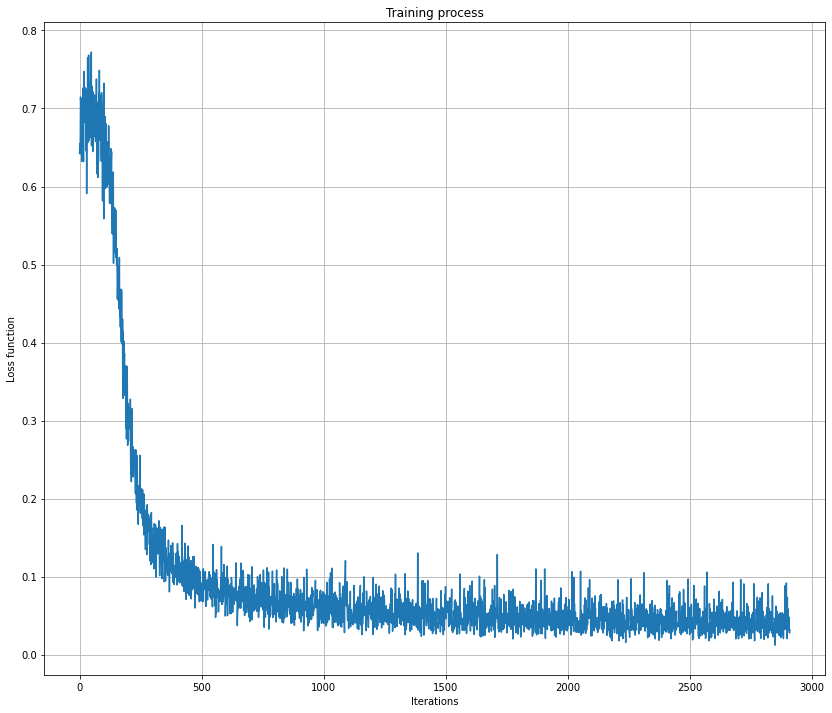

In [26]:
plt.figure(figsize=(14, 12))
plt.plot(losses)
plt.grid()
plt.title('Training process')
plt.xlabel('Iterations')
plt.ylabel('Loss function');

In [27]:
np.mean(losses)

0.09950502881784982